In [50]:
import numpy as np

import pandas as pd
from pandas.api.types import is_numeric_dtype

In [51]:
from google.colab import drive
drive.mount('/content/drive/')


df = pd.read_csv("drive/MyDrive/Appunti Università/Magistrale/Machine Learning/Progetto/modified.csv", sep=",")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [52]:
df.head()

,tournament,surface,round,player_1,player_2,player_1_rank,player_2_rank,player_1_winner_sets,player_2_winner_sets,player_1_bet365,player_2_bet365,player_1_pinnacle,player_2_pinnacle,winner
0,Australian Open,Hard,1st Round,Watanuki Y.,Rinderknech A.,138,59,3,0,2.30,1.62,2.18,1.77,1
1,Australian Open,Hard,1st Round,Etcheverry T.,Barrere G.,79,83,3,1,2.30,1.62,2.43,1.63,1
2,Australian Open,Hard,1st Round,Cerundolo F.,Pella G.,29,181,3,0,1.13,6.00,1.17,6.06,1
3,Australian Open,Hard,1st Round,Hurkacz H.,Martinez P.,11,60,3,0,1.06,10.00,1.06,13.22,1
4,Australian Open,Hard,1st Round,Nishioka Y.,Ymer M.,33,69,3,0,1.91,1.91,2.02,1.88,1


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tournament            506 non-null    object 
 1   surface               506 non-null    object 
 2   round                 506 non-null    object 
 3   player_1              506 non-null    object 
 4   player_2              506 non-null    object 
 5   player_1_rank         506 non-null    int64  
 6   player_2_rank         506 non-null    int64  
 7   player_1_winner_sets  506 non-null    int64  
 8   player_2_winner_sets  506 non-null    int64  
 9   player_1_bet365       506 non-null    float64
 10  player_2_bet365       506 non-null    float64
 11  player_1_pinnacle     506 non-null    float64
 12  player_2_pinnacle     506 non-null    float64
 13  winner                506 non-null    int64  
dtypes: float64(4), int64(5), object(5)
memory usage: 55.5+ KB


Rimuoviamo tutte le colonne che non contengono dati numerici

In [54]:
numeric_columns = [col for col in df.columns if is_numeric_dtype(df[col])]
numeric_columns

['player_1_rank',
 'player_2_rank',
 'player_1_winner_sets',
 'player_2_winner_sets',
 'player_1_bet365',
 'player_2_bet365',
 'player_1_pinnacle',
 'player_2_pinnacle',
 'winner']

Rimuoviamo la colonna target, che non è necessaria in questo caso

In [55]:
numeric_columns.remove('winner')
numeric_columns

['player_1_rank',
 'player_2_rank',
 'player_1_winner_sets',
 'player_2_winner_sets',
 'player_1_bet365',
 'player_2_bet365',
 'player_1_pinnacle',
 'player_2_pinnacle']

In [56]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[numeric_columns])
scaled_data

array([[ 0.60508211, -0.12086188,  0.92369317, ..., -0.33940926,
        -0.32309325, -0.32793708],
       [-0.00358833,  0.12660848,  0.92369317, ..., -0.33940926,
        -0.27652742, -0.35365735],
       [-0.51941073,  1.13711244,  0.92369317, ...,  0.56649415,
        -0.51121921,  0.46020549],
       ...,
       [-0.71542325, -0.24459706, -0.68245371, ..., -0.05398764,
        -0.46092811, -0.10012897],
       [-0.69479035, -0.71891525, -1.48552716, ..., -0.42627671,
         0.183543  , -0.428981  ],
       [-0.80827128, -0.69829272, -0.68245371, ...,  0.22109262,
        -0.49073024,  0.10563319]])

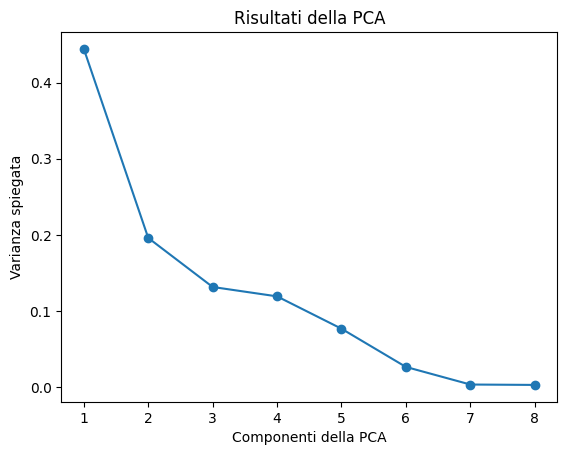

In [57]:
import matplotlib.pyplot as plt

pca = PCA().fit(scaled_data)

plt.plot(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_, marker='o')
plt.xlabel('Componenti della PCA')
plt.ylabel('Varianza spiegata')
plt.title("Risultati della PCA")
plt.show()

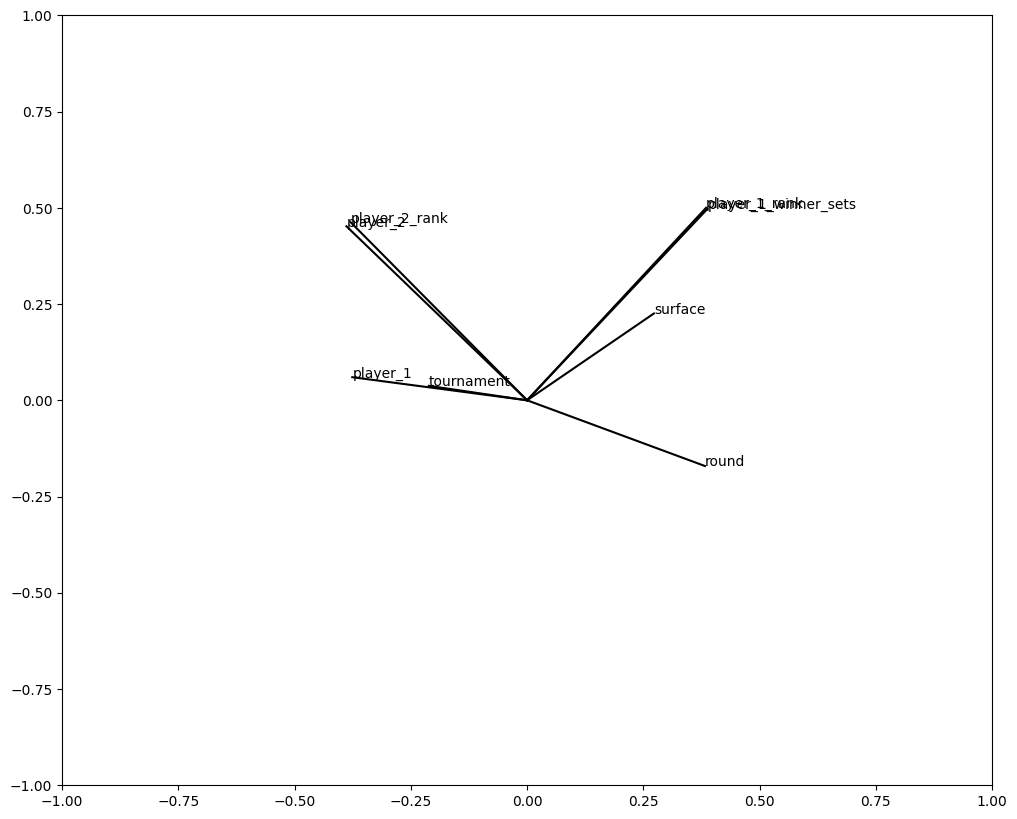

In [58]:
pca = PCA(n_components=6).fit(scaled_data)

pcs = pca.components_
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])

for i, (x, y) in enumerate(zip(pcs[0, :], pcs[1, :])):
    # plot line between origin and point (x, y)
    ax.plot([0, x], [0, y], color='k')
    # display the label of the point
    ax.text(x, y, df.columns[i], fontsize='10')